<h3 style="color:Black;">Module Code: CSMAD</h3>

<h3 style="color:Black;">
    Assignment report Title: Predicting the Total volume of vehicles from two sites together</h3>

<h3 style="color:Black;">Student Number: 32822955</h3>

<h3 style="color:Black;">Actual hrs spent for the assignment: 24 hrs</h3>

<h3 style="color:Black;">Which Artificial Intelligence tools used (if applicable): Gemini (For domain Knowledge)</h3>

<hr style="border:2px solid black"> </hr>

## Table of Contents
[1. Overview](#Overview)
  - [1.1 Data Pre-processing](#Overview)
  - [1.2 Data Cleaning](#Data_Cleaning)
    
[2. Exploratory Data Analysis](#Exploratory_Data_Analysis)
  - [2.1 Statistical Report](#Statistics)
  - [2.2 Visualizations](#Visualizations)
      
[3. Feature Engineering](#Feature_Engineering)

[4. Model Selection and Evaluation](#Models)
  - [4.1 Regression Models](#Regression)
  - [4.2 Time Series Models](#DTime_Series)
    
[5. Summary and References](#Conclusion)

<hr style="border:1px solid black"> </hr>
<h3 style="color:Black;">1. Overview</h3>

The following libraries are imported for accurate data analysis:
- Pandas is used for data manipulation and analysis
- Numpy is used for numerical operations
- Matplotlib.pyplot and seaborn are used for data visualization
- datetime is used for formatting and manipulating date and time
- sklearn.impute is used for handling missing data by using various strategies
- sklearn.linear_model for implementing regression variants to predict numerical target values
- sklearn.model_selection for splitting the dataset into training and testing sets
- sklearn.metrics for evaluating the performance of regression models
- sklearn.preprocessing for standardizing numerical features and encoding categorical features 
- statsmodels.tsa is used for forecasting time series data using ARIMA and SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

<hr style="border:1px solid black"> </hr>
<h4 style="color:Black;">1.1 Data Pre-processing</h4>

- Loading 4 years of weather data and merging all files using try and except method to build exception handling, and then displaying the summary

In [2]:
# Loading and Merging Weather Data
try:
    weather_df = pd.concat(
        [
            pd.read_csv(f"Downloads/CSMAD_CW2_data/data/weather/03761099999_{year}.csv", low_memory=False)
            for year in range(2021, 2025)
        ]
    )
except FileNotFoundError:
    print("Error: Please check the file paths, Weather data files are not found.")
except Exception as e:
    print(f"An unexpected error occurred while reading weather data: {e}")

# Displaying summary of weather dataframe
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86855 entries, 0 to 17497
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          86855 non-null  int64  
 1   DATE             86855 non-null  object 
 2   SOURCE           86855 non-null  int64  
 3   LATITUDE         86855 non-null  float64
 4   LONGITUDE        86855 non-null  float64
 5   ELEVATION        86855 non-null  float64
 6   NAME             86855 non-null  object 
 7   REPORT_TYPE      86855 non-null  object 
 8   CALL_SIGN        86855 non-null  int64  
 9   QUALITY_CONTROL  86855 non-null  object 
 10  WND              86855 non-null  object 
 11  CIG              86855 non-null  object 
 12  VIS              86855 non-null  object 
 13  TMP              86855 non-null  object 
 14  DEW              86855 non-null  object 
 15  SLP              86855 non-null  object 
 16  AA1              19854 non-null  object 
 17  AA2              

- The dataset consists of 86,855 records from weather stations, with 46 columns including station identifiers, geographical details (latitude, longitude, elevation), and various weather attributes (e.g., temperature, humidity, pressure). Many columns have meteorological data, such as wind speed (WND), temperature (TMP), and dew point (DEW). Some columns have missing values, particularly for specific weather measurements (e.g., AA1, AA2), while others are complete, like STATION, DATE, and SOURCE.

**********
Dropping FM15 values to reduce noise or inconsistencies in the dataset.

In [3]:
# Dropping FM15 values from weather dataframe
weather_df = weather_df[weather_df['REPORT_TYPE'] == 'FM-12']

In [4]:
# Displays weather dataframe summary
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31569 entries, 0 to 17496
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          31569 non-null  int64  
 1   DATE             31569 non-null  object 
 2   SOURCE           31569 non-null  int64  
 3   LATITUDE         31569 non-null  float64
 4   LONGITUDE        31569 non-null  float64
 5   ELEVATION        31569 non-null  float64
 6   NAME             31569 non-null  object 
 7   REPORT_TYPE      31569 non-null  object 
 8   CALL_SIGN        31569 non-null  int64  
 9   QUALITY_CONTROL  31569 non-null  object 
 10  WND              31569 non-null  object 
 11  CIG              31569 non-null  object 
 12  VIS              31569 non-null  object 
 13  TMP              31569 non-null  object 
 14  DEW              31569 non-null  object 
 15  SLP              31569 non-null  object 
 16  AA1              19853 non-null  object 
 17  AA2              

- After dropping the FM-15 values, the dataset now contains 31,569 records with 46 columns. The number of rows is reduced from 86,855 to 31569 which help in making the analysis and model predictions more reliable

************************
- Loading 4 years of traffic data for two devices and merging all files using try and except method to build exception handling, and then displaying the first 5 rows

In [5]:
# Loading traffic data and merging all files
try:
    traffic_data = [
        f"Downloads/CSMAD_CW2_data/data/traffic/DailyStandard_Report_1_{site_id}_01_01_{year}_31_12_{year}.csv"
        for year in range(2021, 2024)
        for site_id in ["19078", "19124"]
    ]
    traffic_data += [
        f"Downloads/CSMAD_CW2_data/data/traffic/DailyStandard_Report_1_{site_id}_01_01_2024_14_09_2024.csv"
        for site_id in ["19078", "19124"]
    ]
    traffic_df = pd.concat([pd.read_csv(file, low_memory=False) for file in traffic_data])
except FileNotFoundError:
    print("Error: Please check the file paths, Traffic data files not found.")
except Exception as e:
    print(f"An unexpected error occurred while reading traffic data: {e}")

# Displaying summary of traffic dataframe
print(traffic_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 245176 entries, 0 to 20347
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Site Name           245176 non-null  object 
 1   Report Date         245176 non-null  object 
 2   Time Period Ending  245176 non-null  object 
 3   Time Interval       245176 non-null  int64  
 4   0 - 520 cm          228455 non-null  float64
 5   521  - 660 cm       228455 non-null  float64
 6   661 - 1160 cm       228455 non-null  float64
 7   1160+ cm            228455 non-null  float64
 8   0 - 10 mph          0 non-null       float64
 9   11 - 15 mph         0 non-null       float64
 10  16 - 20 mph         0 non-null       float64
 11  21 - 25 mph         0 non-null       float64
 12  26 - 30 mph         0 non-null       float64
 13  31 - 35 mph         0 non-null       float64
 14  36 - 40 mph         0 non-null       float64
 15  41 - 45 mph         0 non-null       flo

- The dataset consists of 245,176 entries and 24 columns. It contains traffic data, with columns representing various vehicle categories (e.g., vehicle sizes, speed ranges) and attributes like Site Name, Report Date, and Time Period Ending. Many columns, such as speed range columns contain only missing values, while other columns like Total Volume, Avg mph.

<hr style="border:1px solid black"> </hr>
<h4 style="color:Black;">1.2 Data Cleaning</h4>

In [6]:
# Renaming weather columns for easier access
weather_df.rename(columns={'WND': 'Wind Speed', 'CIG': 'Ceiling Height', 'VIS': 'Sky Visibility', 
                           'TMP': 'Temperature', 'DEW': 'Dew Point', 'SLP': 'Atmospheric Pressure'}, inplace=True)

- Renaming column names of weather dataframe for easy accessing the columns

*******
- Handling missing values

In [7]:
# Handle missing values in traffic data
traffic_df.dropna(subset=['Total Volume'], inplace=True)  # Dropping rows with missing Total Volume


# Mean imputation for 'Avg mph' column
traffic_df['Avg mph'] = traffic_df['Avg mph'].fillna(traffic_df['Avg mph'].mean())

# Renaming columns in traffic data
traffic_df.rename(columns={'0 - 520 cm': '0_520_cm', '521  - 660 cm': '521_660_cm',
                          '661 - 1160 cm': '661_1160_cm', '1160+ cm': '1160_plus_cm'}, inplace=True)

# Fill missing values in length-specific columns
for col in traffic_df.columns[traffic_df.columns.str.contains('cm')]:
    traffic_df[col] = traffic_df[col].fillna(0)

- Dropping missing values of Total Volume in traffic data using dropna() function
- Replacing missing values of Avg mph with mean in traffic data using mean() function
- Filling missing values of length specific traffic column with '0' using fillna() function

In [8]:
# Handling weather datetime conversion and extraction
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'], format='%Y-%m-%dT%H:%M:%S')
weather_df['Date'] = weather_df['DATE'].dt.date
weather_df['Time'] = weather_df['DATE'].dt.time
weather_df['merged_datetime'] = pd.to_datetime(weather_df['Date'].astype(str) + ' ' + weather_df['Time'].astype(str))
weather_df.drop(columns=['Date', 'Time'], inplace=True)

- Converting weather datetime to match traffic date format

In [9]:
# Creating 'Merged Datetime' column for traffic data

# Convert 'Report Date' to datetime format
traffic_df['Report Date'] = pd.to_datetime(traffic_df['Report Date'], errors='coerce')

# Convert 'Time Period Ending' to string
traffic_df['Time Period Ending'] = traffic_df['Time Period Ending'].astype(str)

# Handle rows where 'Report Date' or 'Time Period Ending' is NaT or missing
# Drop rows where 'Report Date' or 'Time Period Ending' is NaT
traffic_df = traffic_df.dropna(subset=['Report Date', 'Time Period Ending'])

# Combine 'Report Date' and 'Time Period Ending' to create a single datetime column
traffic_df['merged_datetime'] = pd.to_datetime(
    traffic_df['Report Date'].astype(str) + ' ' + traffic_df['Time Period Ending']
)

- Converting report date of traffic data and converting it  to string.
- Dropping missing values rows from Report Date and Time Period ending using dropna() function
- And merging report datetime and time period ending as merged_datetime

In [10]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90257 entries, 576 to 14492
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Site Name           90257 non-null  object        
 1   Report Date         90257 non-null  datetime64[ns]
 2   Time Period Ending  90257 non-null  object        
 3   Time Interval       90257 non-null  int64         
 4   0_520_cm            90257 non-null  float64       
 5   521_660_cm          90257 non-null  float64       
 6   661_1160_cm         90257 non-null  float64       
 7   1160_plus_cm        90257 non-null  float64       
 8   0 - 10 mph          0 non-null      float64       
 9   11 - 15 mph         0 non-null      float64       
 10  16 - 20 mph         0 non-null      float64       
 11  21 - 25 mph         0 non-null      float64       
 12  26 - 30 mph         0 non-null      float64       
 13  31 - 35 mph         0 non-null      float64      

**********************
Dropping irrelevant columns from weather and Traffic Data 

In [11]:
# Dropping irrelevant columns from weather data to increase efficiency
weather_df.drop(
columns=["STATION", "SOURCE", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME", "CALL_SIGN",
            "QUALITY_CONTROL", "AA1", "AA2", "AA3", "AJ1", "AW1", "AW2", "AY1", "AY2",  "AZ1", "AZ2", "EQD", "GA1", 
            "GA2", "GA3", "GA4", "GA5", "GE1", "GF1", "IA1", "IA2", "KA1", "KA2", "MA1", "MD1", "MW1", "MW2", "OC1",
            "OD1", "OD2", "REM"], inplace=True)

 # Dropping irrelevant columns from traffic data to increase model performance
traffic_df.drop(
columns=["Report Date","Time Period Ending","0 - 10 mph", "11 - 15 mph", "16 - 20 mph", "21 - 25 mph", "26 - 30 mph", "31 - 35 mph", "36 - 40 mph", 
        "41 - 45 mph", "46 - 50 mph", "51 - 55 mph", "56 - 60 mph", "61 - 70 mph", "71 - 80 mph", "80+ mph"],
    inplace=True)

************
Displaying weather and traffic data summary after handling missing values and dropping irrelevant columns

In [12]:
# Displaying summary of weather dataframe
print(weather_df.info())
# Displaying summary of traffic dataframe
print(traffic_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31569 entries, 0 to 17496
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  31569 non-null  datetime64[ns]
 1   REPORT_TYPE           31569 non-null  object        
 2   Wind Speed            31569 non-null  object        
 3   Ceiling Height        31569 non-null  object        
 4   Sky Visibility        31569 non-null  object        
 5   Temperature           31569 non-null  object        
 6   Dew Point             31569 non-null  object        
 7   Atmospheric Pressure  31569 non-null  object        
 8   merged_datetime       31569 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 90257 entries, 576 to 14492
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           -------------- 

- Dropped all irrelevant columns from weather data and traffic data

In [13]:
# 3. Merging Weather and Traffic Data
traffic_df['merged_datetime'] = pd.to_datetime(traffic_df['merged_datetime'], errors='coerce')
weather_df['merged_datetime'] = pd.to_datetime(weather_df['merged_datetime'], errors='coerce')

traffic_df_cleaned = traffic_df.dropna(subset=['merged_datetime'])
weather_df_cleaned = weather_df.dropna(subset=['merged_datetime'])

# Merge the DataFrames using an outer join to retain all rows from both datasets
merged_df = pd.merge(traffic_df_cleaned, weather_df_cleaned, on='merged_datetime', how='outer')

# Displays the summary of merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121826 entries, 0 to 121825
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Site Name             90257 non-null   object        
 1   Time Interval         90257 non-null   float64       
 2   0_520_cm              90257 non-null   float64       
 3   521_660_cm            90257 non-null   float64       
 4   661_1160_cm           90257 non-null   float64       
 5   1160_plus_cm          90257 non-null   float64       
 6   Avg mph               90257 non-null   float64       
 7   Total Volume          90257 non-null   float64       
 8   merged_datetime       121826 non-null  datetime64[ns]
 9   DATE                  31569 non-null   datetime64[ns]
 10  REPORT_TYPE           31569 non-null   object        
 11  Wind Speed            31569 non-null   object        
 12  Ceiling Height        31569 non-null   object        
 13 

- Dataframe has both traffic (numerical) and weather (categorical and numerical) data, with 121826 entries of merged_datetime.

In [14]:
# Assigning duplicate rows
duplicates = merged_df.duplicated()

# Displaying duplicate rows
print( merged_df.duplicated())

# Count number of duplicate rows in merged dataframe
print(f"Number of duplicate rows: {duplicates.sum()}")

0         False
1         False
2         False
3         False
4         False
          ...  
121821    False
121822    False
121823    False
121824    False
121825    False
Length: 121826, dtype: bool
Number of duplicate rows: 0


- Merged dataframe displays '0' duplicate values

<hr style="border:1px solid black"> </hr>
<h3 style="color:Black;">2. Exploratory Data Analysis</h3>

<h4 style="color:Black;">2.1 Statistical Report</h4>

In [15]:
print("Statistical report for Weather Data:")
print(weather_df.describe())
print("\nStatistical report for Traffic Data:")
print(traffic_df.describe())

Statistical report for Weather Data:
                                DATE                merged_datetime
count                          31569                          31569
mean   2022-11-01 11:33:12.359593472  2022-11-01 11:33:12.359593472
min              2021-01-01 00:00:00            2021-01-01 00:00:00
25%              2021-11-30 20:00:00            2021-11-30 20:00:00
50%              2022-10-30 13:00:00            2022-10-30 13:00:00
75%              2023-10-02 15:00:00            2023-10-02 15:00:00
max              2024-09-08 21:00:00            2024-09-08 21:00:00

Statistical report for Traffic Data:
       Time Interval      0_520_cm    521_660_cm   661_1160_cm  1160_plus_cm  \
count   90257.000000  90257.000000  90257.000000  90257.000000  90257.000000   
mean       47.425341    429.432941     19.453272     24.818917     34.398119   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        23.000000     96.000000      4.000000      6.00000

- Displaying the statistical report of both traffic and weather data, explaining date range in weather data and avg mph, Total volume and other stats of traffic data

<hr style="border:1px solid black"> </hr>
<h4 style="color:Black;">2.2 Visualizations</h4>

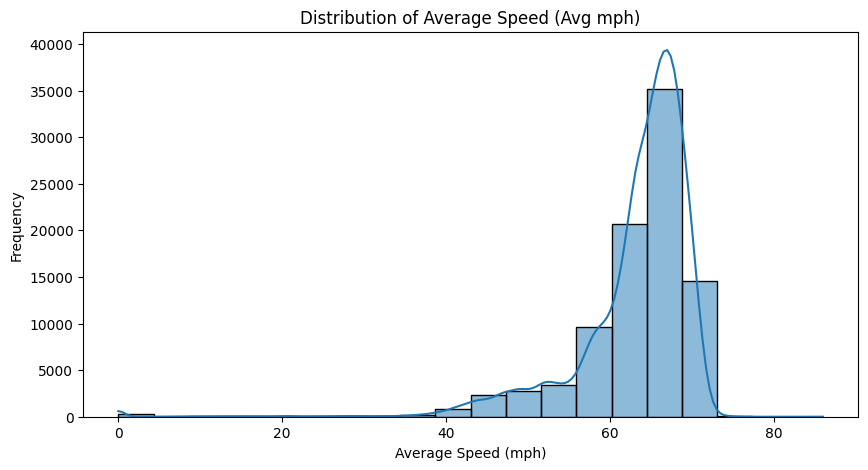

In [16]:
# Distribution of Average Speed (Avg mph)
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Avg mph'], kde=True, bins=20)
plt.title('Distribution of Average Speed (Avg mph)')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Frequency')
plt.show()

- From the plot, concentration of data around a specific speed range can be noticed, indicating that most vehicles passed through the observation sites are at similar average speeds and there might be some skew in the distribution.

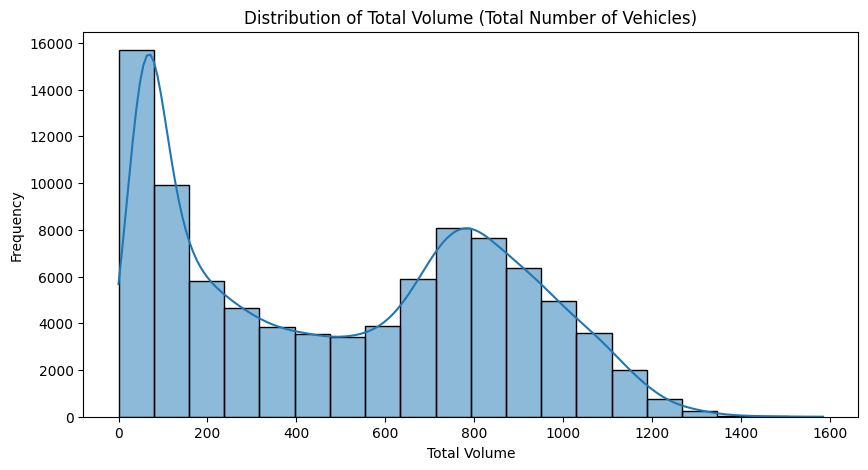

In [17]:
# Distribution of Total Volume (Total number of vehicles)
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Total Volume'], kde=True, bins=20)
plt.title('Distribution of Total Volume (Total Number of Vehicles)')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()

- From the plot,the distribution is right-skewed. Here most of the observations are clustered at lower vehicle volumes (around 0-150), with fewer observations as the total volume increases in tThe peakcorresponding toe vehicle volume rang.


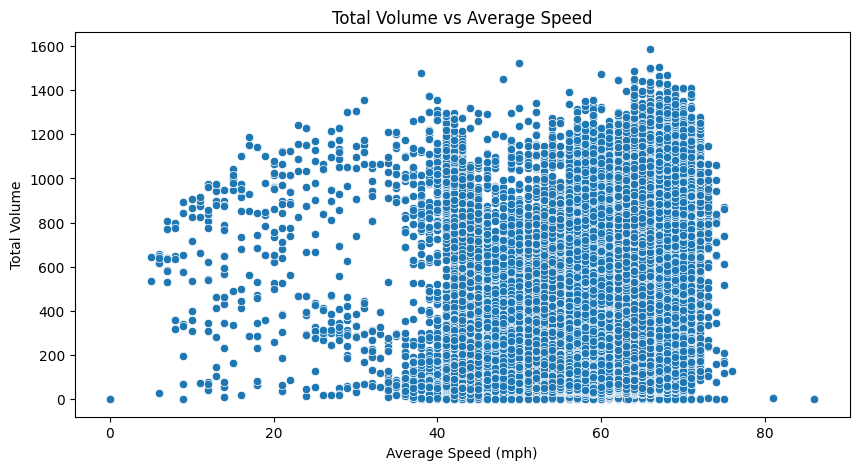

In [18]:
# Plot: Total Volume vs Average Speed
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Avg mph', y='Total Volume', data=merged_df)
plt.title('Total Volume vs Average Speed')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Total Volume')
plt.show()

- The clustering of points on the left side of the plot, where average speeds are low (close to 0 mph) are for periods with low average speeds, the total vehicle volume is low are concentrated around certain values. As the average speed increases, there is increase in total volume values of vehicles with higher average speeds.

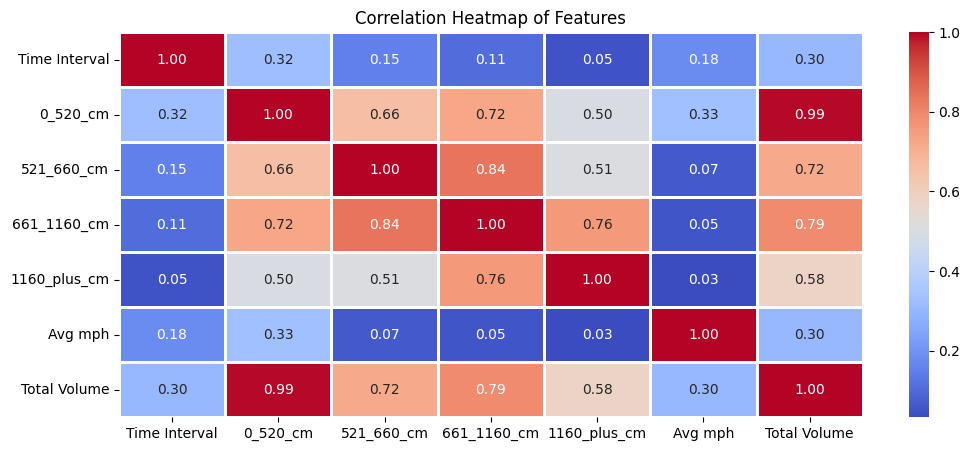

In [19]:
# Step  Correlation Heatmap - Only numerical columns
# Selecting only the numeric columns from the merged_df
numeric_columns = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features')
plt.show()

- The correlation between Total Volume and 0_520_cm is very high (0.99), indicating that the number of vehicles in this range has a strong linear relationship with the total vehicle count. 0_520_cm and 521_660_cm also have a high positive correlation (0.66), suggesting that the vehicle counts in these two categories are similar. Average Speed (Avg mph) has weak correlations with other variables, with the highest being 0.33 with 0_520_cm, showing that speed doesn't strongly correlate with vehicle volume or size in the dataset.

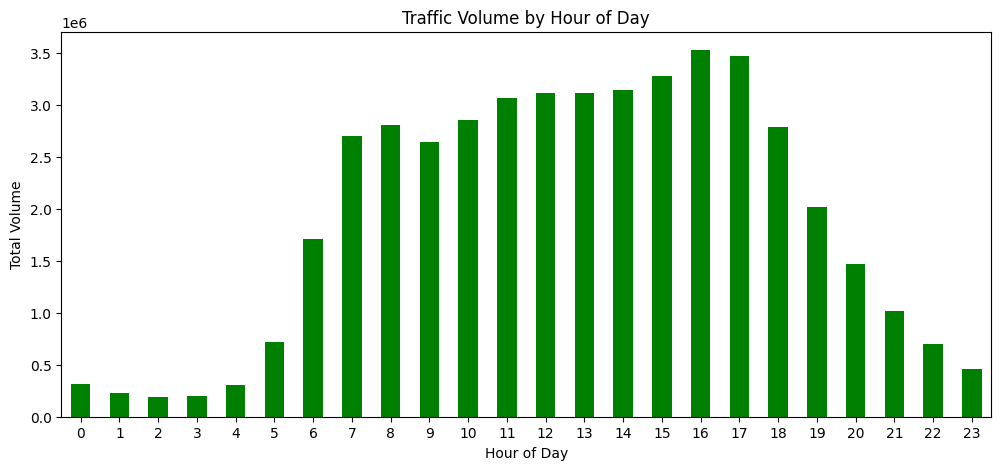

In [20]:
# Ensure that 'Hour of Day' is created from the 'Datetime' column
merged_df['Hour of Day'] = merged_df['merged_datetime'].dt.hour

# Now group by 'Hour of Day' and sum the 'Total Volume'
hourly_traffic = merged_df.groupby('Hour of Day')['Total Volume'].sum()

# Plotting the traffic volume by hour of the day
plt.figure(figsize=(12, 5))
hourly_traffic.plot(kind='bar', color='Green')
plt.title('Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=0)
plt.show()

- The image represents the total traffic volume for each hour of the day, Each bar on the x-axis corresponds to an hour from 0 to 23, representing the hours of the day. The plot shows a clear peak in traffic volume during the late morning and early evening hours (around 6 AM to 7 PM), indicating heavy traffic during these hours. Lower traffic volumes are observed in the early morning (midnight to 5 AM) and late evening (after 8 PM), suggesting less activity during those hours.


<hr style="border:1px solid black"> </hr>
<h3 style="color:Black;">3. Feature Engineering</h3>

- Selecting Features/ Predictors of the models

In [21]:
# Capturing the cyclical nature of time (hour, day, month) which influences traffic patterns

# 1. Cyclical Time Features:
#Hour
merged_df['Hour_sin'] = np.sin(2 * np.pi * merged_df['merged_datetime'].dt.hour / 24)
merged_df['Hour_cos'] = np.cos(2 * np.pi * merged_df['merged_datetime'].dt.hour / 24)
#Day of week
merged_df['DayOfWeek_sin'] = np.sin(2 * np.pi * merged_df['merged_datetime'].dt.dayofweek / 7)
merged_df['DayOfWeek_cos'] = np.cos(2 * np.pi * merged_df['merged_datetime'].dt.dayofweek / 7)
#Month
merged_df['Month_sin'] = np.sin(2 * np.pi * merged_df['merged_datetime'].dt.month / 12)
merged_df['Month_cos'] = np.cos(2 * np.pi * merged_df['merged_datetime'].dt.month / 12)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121826 entries, 0 to 121825
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Site Name             90257 non-null   object        
 1   Time Interval         90257 non-null   float64       
 2   0_520_cm              90257 non-null   float64       
 3   521_660_cm            90257 non-null   float64       
 4   661_1160_cm           90257 non-null   float64       
 5   1160_plus_cm          90257 non-null   float64       
 6   Avg mph               90257 non-null   float64       
 7   Total Volume          90257 non-null   float64       
 8   merged_datetime       121826 non-null  datetime64[ns]
 9   DATE                  31569 non-null   datetime64[ns]
 10  REPORT_TYPE           31569 non-null   object        
 11  Wind Speed            31569 non-null   object        
 12  Ceiling Height        31569 non-null   object        
 13 

- Creating cyclical features such as 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin', 'Month_cos' and displaying the summary of the merged dataframe.

In [22]:
# Listing predictors from merged_df as 'merged_datetime' and 'Total Volume' columns

# List of predictors (replace with actual column names)
predictors = ['Avg mph', 'Hour_sin', 'Hour_cos',
              'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin', 'Month_cos']

In [23]:
# Creating 'Day Type' feature

def get_day_type(date):
    # Ensuring the date is a valid datetime object
    if pd.isnull(date):
      # Returning None if date is NaT (Not a Time)   
        return None 
        
    weekday = date.weekday()
    month = date.month
    day = date.day
    
    # Implementing Day Type based on the provided conditions
    if weekday == 0: return 0  # First working day of normal week (Monday)
    elif weekday == 1: return 1  # Normal working Tuesday
    elif weekday == 2: return 2  # Normal working Wednesday
    elif weekday == 3: return 3  # Normal working Thursday
    elif weekday == 4: return 4  # Last working day of normal week (Friday)
    elif weekday == 5: return 5  # Saturday, but excluding type 14
    elif weekday == 6: return 6  # Sunday, but excluding type 14
    elif month == 8: return 7  # First day of school holidays (simplified assumption)
    elif month == 12: return 9  # Middle of school holidays
    elif month == 12 and day == 25: return 14  # Christmas/New Year
    return 12  # Default to Bank Holidays for simplicity

merged_df['Day Type'] = merged_df['merged_datetime'].apply(get_day_type)

- Creating Day type feature to compare time series and regression models, and to explore the effect of its inclusion.

In [24]:
# Drop the columns 'Temperature', 'Wind Speed', and 'Atmospheric Pressure'
merged_df.drop(columns=['Temperature', 'Wind Speed', 'Atmospheric Pressure'], inplace=True)

- Dropping missing value columns to maintain data consistency 

In [25]:
#  Convert all predictors to numeric (this is useful if there are any non-numeric values)
for column in merged_df.columns:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

- Converting non-numeric columns to numeric to train the models

In [26]:
impute = SimpleImputer(strategy='mean')
merged_df[predictors] = impute.fit_transform(merged_df[predictors])

- Imputing mean to null values to increase model efficiency

In [27]:
# Fill missing target variable using the mean
merged_df['Total Volume'] = merged_df['Total Volume'].fillna(merged_df['Total Volume'].mean())

In [28]:
merged_df.describe()

,Site Name,Time Interval,0_520_cm,521_660_cm,661_1160_cm,1160_plus_cm,Avg mph,Total Volume,merged_datetime,DATE,...,Sky Visibility,Dew Point,Hour of Day,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Month_sin,Month_cos,Day Type
count,0.0,90257.000000,90257.000000,90257.000000,90257.000000,90257.000000,121826.000000,121826.000000,1.218260e+05,1.218260e+05,...,0.0,0.0,121826.000000,1.218260e+05,1.218260e+05,121826.000000,121826.000000,1.218260e+05,1.218260e+05,121826.000000
mean,NaN,47.425341,429.432941,19.453272,24.818917,34.398119,63.115907,508.103061,1.665333e+18,-6.401251e+18,...,NaN,NaN,11.480103,2.184736e-03,4.062709e-04,-0.004420,-0.000378,8.177220e-03,-1.557991e-02,3.008151
std,NaN,27.699427,321.955885,19.571032,21.066456,23.536178,6.525750,313.510103,3.286677e+16,4.771888e+18,...,NaN,NaN,6.921481,7.074756e-01,7.067401e-01,0.705300,0.708901,7.076542e-01,7.063456e-01,2.001893
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609459e+18,-9.223372e+18,...,NaN,NaN,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000
25%,NaN,23.000000,96.000000,4.000000,6.000000,16.000000,63.000000,223.000000,1.638321e+18,-9.223372e+18,...,NaN,NaN,5.000000,-7.071068e-01,-7.071068e-01,-0.781831,-0.900969,-5.000000e-01,-8.660254e-01,1.000000
50%,NaN,47.000000,434.000000,13.000000,19.000000,26.000000,63.115907,508.103061,1.664845e+18,-9.223372e+18,...,NaN,NaN,11.000000,1.224647e-16,6.123234e-17,0.000000,-0.222521,1.224647e-16,-1.836970e-16,3.000000
75%,NaN,71.000000,695.000000,28.000000,41.000000,51.000000,67.000000,747.000000,1.691404e+18,1.613714e+18,...,NaN,NaN,17.000000,7.071068e-01,7.071068e-01,0.781831,0.623490,8.660254e-01,5.000000e-01,5.000000
max,NaN,95.000000,1408.000000,108.000000,209.000000,258.000000,86.000000,1585.000000,1.733443e+18,1.725829e+18,...,NaN,NaN,23.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,6.000000


In [29]:
merged_df = merged_df.dropna(subset=predictors + ['Total Volume'])

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121826 entries, 0 to 121825
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Site Name        0 non-null       float64
 1   Time Interval    90257 non-null   float64
 2   0_520_cm         90257 non-null   float64
 3   521_660_cm       90257 non-null   float64
 4   661_1160_cm      90257 non-null   float64
 5   1160_plus_cm     90257 non-null   float64
 6   Avg mph          121826 non-null  float64
 7   Total Volume     121826 non-null  float64
 8   merged_datetime  121826 non-null  int64  
 9   DATE             121826 non-null  int64  
 10  REPORT_TYPE      0 non-null       float64
 11  Ceiling Height   0 non-null       float64
 12  Sky Visibility   0 non-null       float64
 13  Dew Point        0 non-null       float64
 14  Hour of Day      121826 non-null  int32  
 15  Hour_sin         121826 non-null  float64
 16  Hour_cos         121826 non-null  floa

In [31]:
merged_df.head()

,Site Name,Time Interval,0_520_cm,521_660_cm,661_1160_cm,1160_plus_cm,Avg mph,Total Volume,merged_datetime,DATE,...,Sky Visibility,Dew Point,Hour of Day,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Month_sin,Month_cos,Day Type
0,NaN,NaN,NaN,NaN,NaN,NaN,63.115907,508.103061,1609459200000000000,1609459200000000000,...,NaN,NaN,0,0.000000,1.000000,-0.433884,-0.900969,0.5,0.866025,4
1,NaN,NaN,NaN,NaN,NaN,NaN,63.115907,508.103061,1609462800000000000,1609462800000000000,...,NaN,NaN,1,0.258819,0.965926,-0.433884,-0.900969,0.5,0.866025,4
2,NaN,NaN,NaN,NaN,NaN,NaN,63.115907,508.103061,1609466400000000000,1609466400000000000,...,NaN,NaN,2,0.500000,0.866025,-0.433884,-0.900969,0.5,0.866025,4
3,NaN,NaN,NaN,NaN,NaN,NaN,63.115907,508.103061,1609470000000000000,1609470000000000000,...,NaN,NaN,3,0.707107,0.707107,-0.433884,-0.900969,0.5,0.866025,4
4,NaN,NaN,NaN,NaN,NaN,NaN,63.115907,508.103061,1609473600000000000,1609473600000000000,...,NaN,NaN,4,0.866025,0.500000,-0.433884,-0.900969,0.5,0.866025,4


<hr style="border:1px solid black"> </hr>
<h3 style="color:Black;">4. Model Implementation</h3>

<h4 style="color:Black;">4.2 Regression Models</h4>

In [32]:
# Predictor variables
X = merged_df[predictors + [col for col in merged_df.columns if col.startswith('Day Type_')]]
y = merged_df['Total Volume']

In [33]:
# Split the data into train and test sets (Assigning 80% training data, 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 5.3 Lasso Regression Model (Feature Selection with L1 Regularization)
try:
    lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization strength
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    
    # Evaluate Lasso Regression
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    
    print("Lasso Regression Model Performance:")
    print(f"MAE: {mae_lasso}")
    print(f"MSE: {mse_lasso}")
    print(f"RMSE: {rmse_lasso}")

except ValueError as ve:
    print(f"ValueError occurred: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Lasso Regression Model Performance:
MAE: 167.29005866196442
MSE: 40914.513334510586
RMSE: 202.27336288921137


- Lasso Regression with Day Type performance is very poor, so implementing cross-validation regression methods further

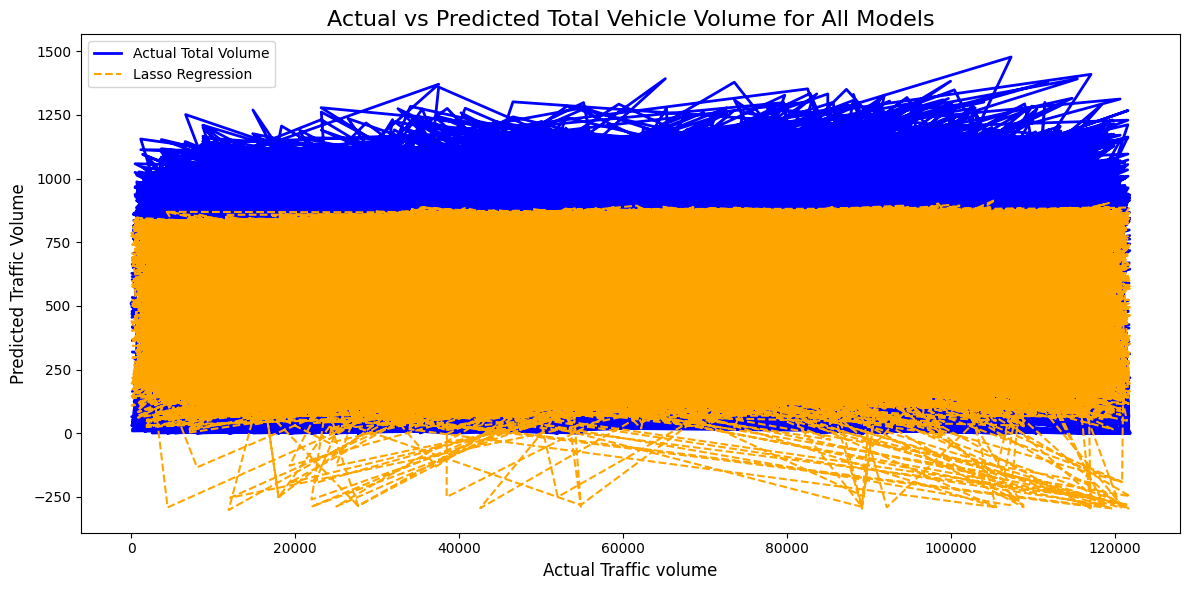

In [35]:
# y_test contains actual 'Total Volume' values and
# y_pred_lin_reg, y_pred_ridge, and y_pred_lasso contain predictions from respective models

# Plotting Actual vs Predicted Total Volume for all models
plt.figure(figsize=(12, 6))

# Plot the actual values (y_test)
plt.plot(y_test.index, y_test, label='Actual Total Volume', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred_lasso, label='Lasso Regression', color='orange', linestyle='dashed')

# Adding title and labels
plt.title('Actual vs Predicted Total Vehicle Volume for All Models', fontsize=16)
plt.xlabel('Actual Traffic volume', fontsize=12)
plt.ylabel('Predicted Traffic Volume', fontsize=12)

# Displaying the legend
plt.legend(loc='upper left')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

- The wide gap between the actual and predicted values suggests that Lasso might not be the most appropriate model for this problem. It could be over-regularizing, reducing the complexity of the model too much and, therefore, failing to capture the underlying trends in the data.

In [36]:
# Linear Regression with Cross-validation

lin_reg = LinearRegression()
cv_scores_lin_reg = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_lin_reg = -cv_scores_lin_reg  # Convert negative MSE to positive
print(f"Linear Regression Mean CV MSE: {cv_scores_lin_reg.mean()}")

Linear Regression Mean CV MSE: 42387.23856141028


In [37]:
# Ridge Regression with Cross-validation

ridge_reg = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = -cv_scores_ridge  # Convert negative MSE to positive
print(f"Ridge Regression Mean CV MSE: {cv_scores_ridge.mean()}")


Ridge Regression Mean CV MSE: 42387.228850571584


In [38]:
# Lasso Regression with Cross-validation

lasso_reg = Lasso(alpha=0.1)
cv_scores_lasso = cross_val_score(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = -cv_scores_lasso  # Convert negative MSE to positive
print(f"Lasso Regression Mean CV MSE: {cv_scores_lasso.mean()}")

Lasso Regression Mean CV MSE: 42379.82652675615


- Mean Cross validation of Linear, Ridge and Lasso regression models are almost similar which is 42379.82

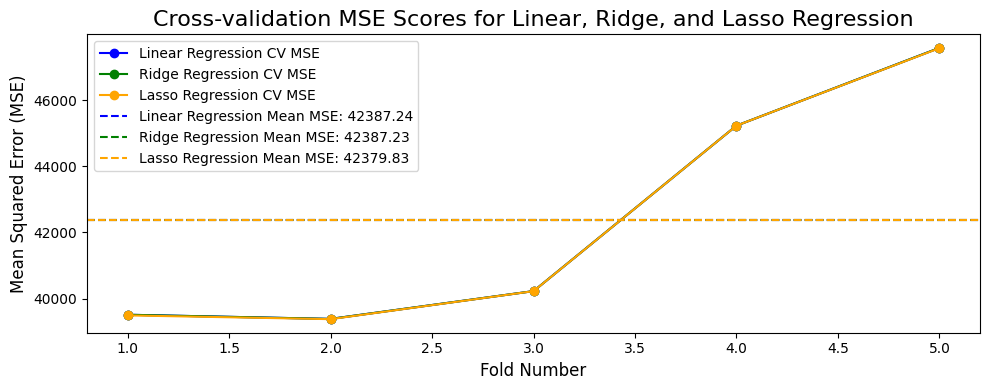

In [39]:
# 1. Visualizing Cross-validation Scores for all models
plt.figure(figsize=(10, 4))

# Plot individual CV scores (MSE) for Linear Regression
plt.plot(range(1, 6), cv_scores_lin_reg, marker='o', label='Linear Regression CV MSE', color='blue')

# Plot individual CV scores (MSE) for Ridge Regression
plt.plot(range(1, 6), cv_scores_ridge, marker='o', label='Ridge Regression CV MSE', color='green')

# Plot individual CV scores (MSE) for Lasso Regression
plt.plot(range(1, 6), cv_scores_lasso, marker='o', label='Lasso Regression CV MSE', color='orange')

# Add mean horizontal lines for each model
plt.axhline(y=cv_scores_lin_reg.mean(), color='blue', linestyle='--', label=f'Linear Regression Mean MSE: {cv_scores_lin_reg.mean():.2f}')
plt.axhline(y=cv_scores_ridge.mean(), color='green', linestyle='--', label=f'Ridge Regression Mean MSE: {cv_scores_ridge.mean():.2f}')
plt.axhline(y=cv_scores_lasso.mean(), color='orange', linestyle='--', label=f'Lasso Regression Mean MSE: {cv_scores_lasso.mean():.2f}')

# Adding title and labels
plt.title('Cross-validation MSE Scores for Linear, Ridge, and Lasso Regression', fontsize=16)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)

# Displaying the legend
plt.legend()

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

- the cross-validation techniques (linear, ridge, and lasso regression) are implemented and the Model performance is evaluated by using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The cross- validation is used as the data is consistent and to mitigate overfitting and underfitting concerns

<hr style="border:1px solid black"> </hr>
<h4 style="color:Black;">4.2 Time Series Models</h4>

In [40]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM

*****
Arima without Day Type

In [41]:
# ARIMA Model (without Day Type)
traffic_df = merged_df.groupby('merged_datetime')['Total Volume'].sum()

# Train-test split for time series
train_size = int(len(traffic_df) * 0.8)
train, test = traffic_df[:train_size], traffic_df[train_size:]

In [42]:
# Split data into train and test sets
train_size = int(len(merged_df) * 0.8)
train, test = merged_df['Total Volume'][:train_size], merged_df['Total Volume'][train_size:]


In [43]:
# Fitting ARIMA model (p, d, q) order (1, 1, 1)
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(len(test))

In [44]:
# 4. Forecasting on the test data
y_pred_arima = arima_fit.forecast(len(test))

In [45]:
# Ensure that test and predicted values do not contain NaN values
# Check for NaN in test set and predictions
if test.isna().any() or np.isnan(y_pred_arima).any():
    print("Warning: NaN values found in the data. Removing NaN values.")
    
    # Remove corresponding NaN values from both test and predictions
    valid_indices = test.dropna().index
    test_cleaned = test.loc[valid_indices]
    y_pred_arima_cleaned = y_pred_arima[valid_indices]

else:
    # If no NaN values, directly assign
    test_cleaned = test
    y_pred_arima_cleaned = y_pred_arima

In [46]:
# 5. Evaluate ARIMA model performance
mae_arima = mean_absolute_error(test, y_pred_arima)
mse_arima = mean_squared_error(test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)

In [47]:
print("ARIMA Model Performance:")
print(f"MAE: {mae_arima}")
print(f"MSE: {mse_arima}")
print(f"RMSE: {rmse_arima}")

ARIMA Model Performance:
MAE: 336.03661385814047
MSE: 163547.76719176382
RMSE: 404.41039451498256


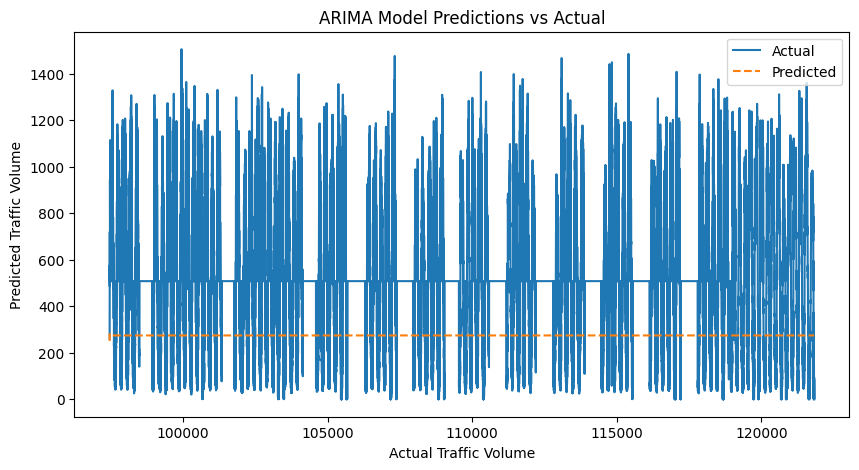

In [48]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, y_pred_arima, label='Predicted', linestyle='dashed')
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.legend()
plt.show()

- ARIMA, shows the clear predictions but the ARIMA model alone is not sufficient for accurate predictions

*****
Arima with Day Type

In [49]:
# Creating 'Day Type' feature
X_with_daytype = merged_df['Day Type']  # Add other features if needed

# Split the data into train-test sets
X_train, X_test = X_with_daytype[:train_size], X_with_daytype[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [50]:
# ARIMA Model with 'Day Type' as an exogenous variable
arima_model_with_daytype = ARIMA(y_train, order=(1, 1, 1), exog=X_train)
arima_fit_with_daytype = arima_model_with_daytype.fit()
# Predictions
y_pred_arima_daytype = arima_fit_with_daytype.forecast(len(test), exog=X_test)

In [51]:
# Model Evaluation
mae_arima_daytype = mean_absolute_error(y_test, y_pred_arima_daytype)
mse_arima_daytype = mean_squared_error(y_test, y_pred_arima_daytype)
rmse_arima_daytype = np.sqrt(mse_arima_daytype)

print(f"ARIMA Model with Day Type Performance:")
print(f"MAE: {mae_arima_daytype}")
print(f"MSE: {mse_arima_daytype}")
print(f"RMSE: {rmse_arima_daytype}")

ARIMA Model with Day Type Performance:
MAE: 334.9397455154789
MSE: 162442.24201303688
RMSE: 403.0412410821464


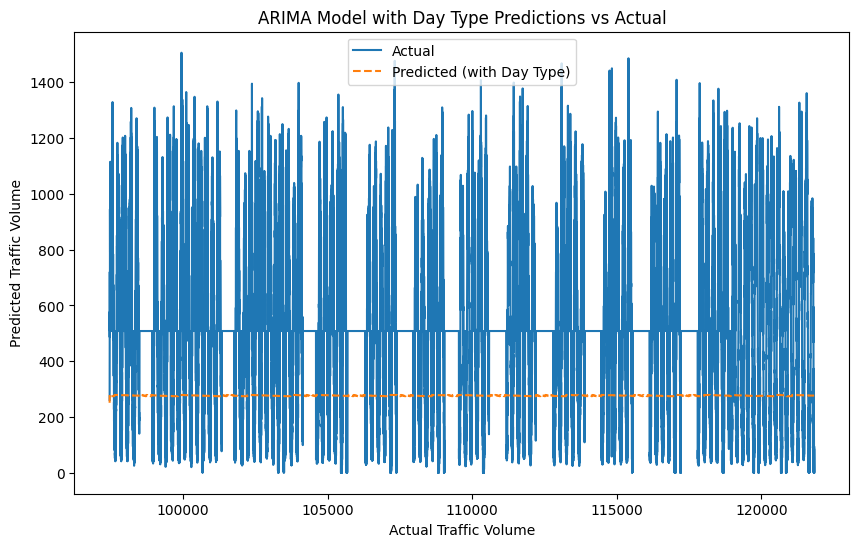

In [52]:
# Plot predictions vs actual with day type
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, y_pred_arima_daytype, label='Predicted (with Day Type)', linestyle='dashed')
plt.title('ARIMA Model with Day Type Predictions vs Actual')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.legend()
plt.show()

- Arima model with Day Type encoded, but this model output also shows the similar predictions to what Arima model without Day Type is showing

In [53]:
# SARIMA Model (p, d, q) x (P, D, Q, S) where S is the seasonal period
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Example parameters
sarima_fit = sarima_model.fit()

# Predictions
y_pred_sarima = sarima_fit.forecast(len(test))

# Model Evaluation
mae_sarima = mean_absolute_error(test, y_pred_sarima)
mse_sarima = mean_squared_error(test, y_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)

In [54]:
print(f"SARIMA Model Performance:")
print(f"MAE: {mae_sarima}")
print(f"MSE: {mse_sarima}")
print(f"RMSE: {rmse_sarima}")

SARIMA Model Performance:
MAE: 351.8360594221283
MSE: 180111.01092195365
RMSE: 424.3948761730679


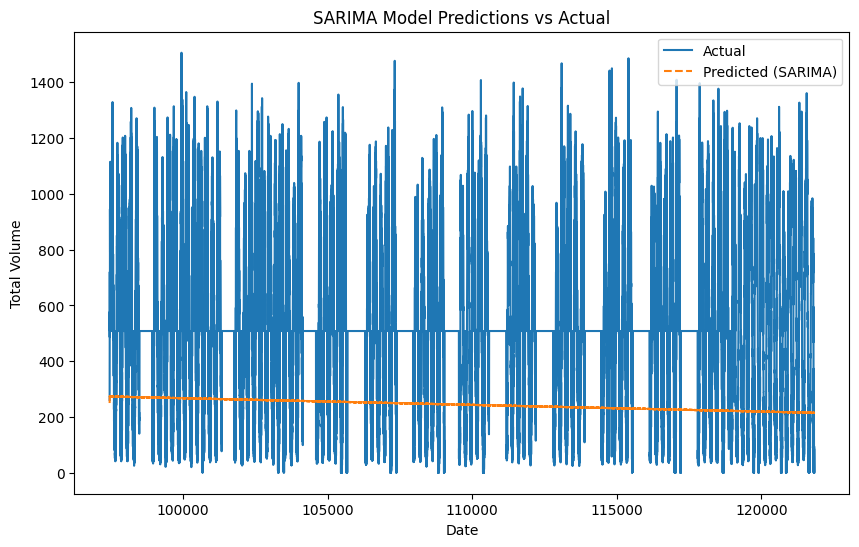

In [55]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, y_pred_sarima, label='Predicted (SARIMA)', linestyle='dashed')
plt.title('SARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.show()

- Adding the value and predict the almost accurate predictions the SARIMAX models are used this showed some significant improve in predications of Traffic volume (the sum of the number of vehicles passing the two sites combined)

<hr style="border:1px solid black"> </hr>
<h3 style="color:Black;">5. Summary and References</h3>

<h4 style="color:Black;">Summary</h4>

- Based on the analysis of the weather and traffic datasets there are various findings like the traffic data spans four years, covers two stations, and is reported in 15-minute intervals. and, the weather data, also spanning four years, covers only one station and is reported hourly by FM-12. To prepare the datasets for analysis and model prediction, preprocessing steps are necessary. These steps included handling missing values, removing irrelevant columns, and ensuring the data is consistent.
- Additionally, the date columns in the weather data were converted, and the 'report date' and 'time period ending' columns were merged to create a timestamp compatible with the weather data. To, merge the both data sets. Following preprocessing, exploratory data analysis (EDA) is conducted, Statistical reporting, including metrics like mean, standard deviation, minimum, and maximum, provided a summary of data distribution. Visualizations, such as 'Distribution of Average Speed' and 'Total Volume vs Average Speed', helped identify trends, outliers, and skewness. To apply regression and time series models, predictor variables were selected through feature selection. to predict the sum of the number of vehicles passing the two sites combined in regression - Lasso Regression, with day type encoding, is employed for modeling but the output of the model is very poor.
- So, the cross-validation techniques (linear, ridge, and lasso regression) are implemented and the Model performance is evaluated by using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The cross- validation is used as the data is consistent and to mitigate overfitting and underfitting concerns. For Time series model the ARIMA and SARIMAX models are used to find to predict the sum of the number of vehicles passing the two sites combined. ARIMA, shows the clear predictions but the ARIMA model alone is not sufficient for accurate predictions so used Arima model with Day Type encoded, but this model output also shows the similar predictions to what Arima model without Day Type is showing. So, to add the value and predict the almost accurate predictions the SARIMAX models are used this showed some significant improve in predications of Traffic volume (the sum of the number of vehicles passing the two sites combined)

<hr style="border:1px solid black"> </hr>
<h4 style="color:Black;">References</h4>

- Muhtadi Zubair, BRAC University (2021) ‘Traffic Forecasting using Time-Series Analysis’ , Available at: http://dx.doi.org/10.1109/ICICT50816.2021.9358682 (Accessed: 23-Jan 2025)

- Bas van der Bijl [Updated 27 April 2022] ‘A Comparison of Approaches for the Time Series Forecasting of Motorway Traffic Flow Rate at Hourly and Daily Aggregation Levels’ Available at: https://doi.org/10.1016/j.procs.2022.03.030 (Accessed: 24-Jan 2025)

- Jin Liu, Naiqi Wu [Updated 28 Dec 2020] ‘A scientometric review of research on traffic forecasting in transportation’ Available at: https://doi.org/10.1049/itr2.12024 (Acessed: 24-Jan-2025)

- Dmitry Pavlyuk (3 February 2021) ‘Spatiotemporal cross-validation of urban traffic forecasting models’ Available at: https://doi.org/10.1016/j.trpro.2021.01.020 (Accessed: 25-Jan 2025)
  
- Savita Lonare (September 2020) ‘Traffic Flow Prediction Using Regression and Deep Learning Approach’ Avalilable at: http://dx.doi.org/10.1007/978-3-030-41862-5_63 (Accessed: 25-Jan 2025)

- Bektemyssova Gulnara(September 2022) ‘TIME SERIES FORECASTING BY THE ARIMA METHOD’ Available at: http://dx.doi.org/10.37943/HFCH4395 (Accessed: 25-Jan 2025)

- Hatem Fahd Al-Selwi (December 2022)  ‘The impact of weather data on traffic flow prediction models’ Available at: http://dx.doi.org/10.11591/ijai.v11.i4.pp1223-1231 (Accessed on: 23-Jan-2025)

In [57]:
%history -f 32822955_CSMAD_CW2.py

File '32822955_CSMAD_CW2.py' exists. Overwrite?  yes


Overwriting file.
